# Подключение библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import RandomOverSampler

# Загрузка данных

In [2]:
churn = pd.read_csv('churn_data.csv')
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
custom = pd.read_csv('customer_data.csv')
custom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
internet = pd.read_csv('internet_data.csv')
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
original_df = churn.merge(custom, how='left', on='customerID').merge(internet, how='left', on='customerID')

In [6]:
# объединяем в один датафрейм
pd.set_option('display.max_columns', 25)
df = churn.merge(custom, how='left', on='customerID').merge(internet, how='left', on='customerID')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


# **Описание датасета**

CustomerID - Идентификатор клиента

Gender - Пол

SeniorCitizen - Указывает, может ли клиент быть классифицирован как пожилой человек

Partner - Указывает, состоит ли клиент в браке

DependentsУказывает, есть ли у клиента иждивенцы

TenureВремя, в течение которого клиент пользовался услугой (в месяцах)

PhoneService  - Указывает, есть ли у клиента стационарная телефонная служба наряду с интернет-службой

MultipleLinesУказывает, есть ли у клиента несколько линий подключения к интернету

InternetService - Вид интернет-услуг, выбранный клиентом

OnlineSecurity - Указывает, подключена ли у клиента онлайн-безопасность

OnlineBackup - Указывает, подключено ли у клиента оперативное резервное копирование

DeviceProtection - Указывает, выбрал ли клиент защиту устройства

TechSupport - Указывает, обращался ли клиент в техподдержку

StreamingTVУказывает, есть ли у клиента возможность потоковой передачи по телевизору

StreamingMovies - Указывает, есть ли у клиента возможность потоковой передачи фильмов

Contract  - Тип контракта, который выбрал клиент

PaperlessBilling  - Указывает, получает ли клиент бумажный счет

PaymentMethod - Выбранный клиентом метод оплаты

MonthlyCharges - Сумма ежемесячного платежа

TotalCharges - Общая сумма денежных средств, уплаченных клиентом компании

Churn  - Отток


# Предварительный анализ и предобработка данных

Для дальнейшего анализа и построения моделей данные необходимо очистить от пустых значений, выбросов и привести к необходимому числовому формату. Предварительно необходимо оценить распределения, размах признаков, взаимосвязи признаков между собой и целевой переменной, чтобы на основании этих знаний выдвигать гипотезы о влиянии тех или иных факторов на возможность оттока клиента.

## Очистка и преобразование данных

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null int64
Contract            7043 non-null float64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null float64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
MultipleLines       7043 non-null float64
InternetService     7043 non-null float64
OnlineSecurity      7043 non-null float64
OnlineBackup        7043 non-null float64
DeviceProtection    7043 non-null float64
TechSupport         7043 non-null float64
StreamingTV         7043 non-null float64
StreamingMovies     7043 non-null float64
dtypes: float64(12), int64(8

In [0]:
# выводим статистическую информацию по строковым типам, чтобы понять вариативность переменных
df.describe(include=[ 'object'])

,customerID,PhoneService,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,3,2,4,6531,2,2,2,2,3,3,3,3,3,3,3,3
top,3058-WQDRE,Yes,Month-to-month,Yes,Electronic check,20.2,No,Male,No,No,No,Fiber optic,No,No,No,No,No,No
freq,1,6361,3875,4171,2365,11,5174,3555,3641,4933,3390,3096,3498,3088,3095,3473,2810,2785


In [0]:
# столбец TotalCharges необходимо привести к типу float
# приведение с помощью astype(float) дало ошибку, сортируем данные в поисках причин для ошибки
df.sort_values('TotalCharges').head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
936,5709-LVOEQ,0,Yes,Two year,No,Mailed check,80.85,,No,Female,0,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes
3826,3213-VVOLG,0,Yes,Two year,No,Mailed check,25.35,,No,Male,0,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
4380,2520-SGTTA,0,Yes,Two year,No,Mailed check,20.00,,No,Female,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
753,3115-CZMZD,0,Yes,Two year,No,Mailed check,20.25,,No,Male,0,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
5218,2923-ARZLG,0,Yes,One year,Yes,Mailed check,19.70,,No,Male,0,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service


In [7]:
# встречаются строки с пробелом, заменяем пробел на значение 'NaN', после чего преобразуем формат
df['TotalCharges'] = df['TotalCharges'].str.replace(' ', 'NaN').astype(float)
# проверяем количество сделанных замен
df['TotalCharges'].isnull().sum()

11

In [8]:
# т.к. 'NaN'-значений мало, заменяем их средним значением переменной
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [0]:
list(df.columns)

['customerID',
 'tenure',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [9]:
# приводим категориальные переменные со значениями 'Yes/No' к количественному типу, заменяя на 1 и 0 соответственно
def categorial_convert_numeric(df, list_columns):
    dict_yes_no = {'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1}
    for column in list_columns:
        df[column] = df[column].map(dict_yes_no)
    return df

list_columns_for_convert = ['PhoneService',
 'PaperlessBilling',
 'Churn',
 'Partner',
 'Dependents',
 'gender']

categorial_convert_numeric(df, list_columns_for_convert)
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [10]:
# категориальные переменные, принимающие больше 2 значений, приводим к количественному типу с помощью "каунтов",
# не используем "One hot encoding", чтобы не увеличивать в разы количество столбцов, т.к. таких переменных много
def use_counts(list_columns_counts, df = df, target_column = 'Churn'):
    dict_category = {}
    for column in list_columns_counts:
        dict_category[column] = (df[df[target_column] == 1][column].value_counts() / df[column].value_counts()).to_dict()
    for column in list_columns_counts:
        df[column] = df[column].apply(dict_category[column].get)
    print(dict_category)
    return df

list_columns_counts = ['Contract',
 'PaymentMethod',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

use_counts(list_columns_counts)
df.head()

{'Contract': {'Month-to-month': 0.4270967741935484, 'One year': 0.11269517990495587, 'Two year': 0.02831858407079646}, 'PaymentMethod': {'Electronic check': 0.4528541226215645, 'Mailed check': 0.19106699751861042, 'Bank transfer (automatic)': 0.16709844559585493, 'Credit card (automatic)': 0.15243101182654403}, 'MultipleLines': {'No': 0.2504424778761062, 'No phone service': 0.24926686217008798, 'Yes': 0.286098956580276}, 'InternetService': {'Fiber optic': 0.4189276485788114, 'DSL': 0.1895910780669145, 'No': 0.07404980340760157}, 'OnlineSecurity': {'No': 0.4176672384219554, 'Yes': 0.14611193660227836, 'No internet service': 0.07404980340760157}, 'OnlineBackup': {'No': 0.39928756476683935, 'Yes': 0.21531494442157267, 'No internet service': 0.07404980340760157}, 'DeviceProtection': {'No': 0.3912762520193861, 'Yes': 0.2250206440957886, 'No internet service': 0.07404980340760157}, 'TechSupport': {'No': 0.4163547365390153, 'Yes': 0.15166340508806261, 'No internet service': 0.0740498034076015

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,0.427097,1,0.452854,29.85,29.85,0,0,0,1,0,0.249267,0.189591,0.417667,0.215315,0.391276,0.416355,0.335231,0.336804
1,5575-GNVDE,34,1,0.112695,0,0.191067,56.95,1889.50,0,1,0,0,0,0.250442,0.189591,0.146112,0.399288,0.225021,0.416355,0.335231,0.336804
2,3668-QPYBK,2,1,0.427097,1,0.191067,53.85,108.15,1,1,0,0,0,0.250442,0.189591,0.146112,0.215315,0.391276,0.416355,0.335231,0.336804
3,7795-CFOCW,45,0,0.112695,0,0.167098,42.30,1840.75,0,1,0,0,0,0.249267,0.189591,0.146112,0.399288,0.225021,0.151663,0.335231,0.336804
4,9237-HQITU,2,1,0.427097,1,0.452854,70.70,151.65,1,0,0,0,0,0.250442,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804


## Предварительный анализ данных

In [0]:
# смотрим статистики, оцениваем разброс значений
df.describe()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.903166,0.265370,0.592219,0.265370,64.761692,2283.300441,0.265370,0.504756,0.162147,0.483033,0.299588,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370,0.265370
std,24.559481,0.295752,0.181091,0.491457,0.133951,30.090047,2265.000258,0.441561,0.500013,0.368612,0.499748,0.458110,0.017711,0.142383,0.153399,0.129075,0.124335,0.151419,0.101781,0.101979
min,0.000000,0.000000,0.028319,0.000000,0.152431,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.249267,0.074050,0.074050,0.074050,0.074050,0.074050,0.074050,0.074050
25%,9.000000,1.000000,0.112695,0.000000,0.167098,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250442,0.189591,0.146112,0.215315,0.225021,0.151663,0.300702,0.299414
50%,29.000000,1.000000,0.427097,1.000000,0.191067,70.350000,1400.550000,0.000000,1.000000,0.000000,0.000000,0.000000,0.250442,0.189591,0.146112,0.215315,0.225021,0.151663,0.300702,0.299414
75%,55.000000,1.000000,0.427097,1.000000,0.452854,89.850000,3786.600000,1.000000,1.000000,0.000000,1.000000,1.000000,0.286099,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804
max,72.000000,1.000000,0.427097,1.000000,0.452854,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,0.286099,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804


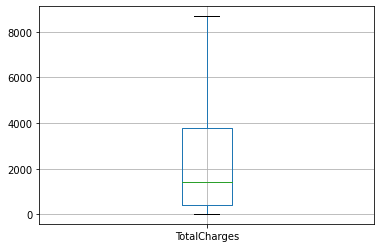

In [0]:
# строим диаграмму размаха, ищем выбросы
df.boxplot('TotalCharges')

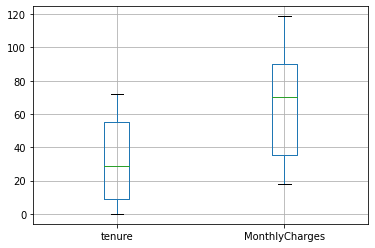

In [0]:
df.boxplot(['tenure',
 'MonthlyCharges'])

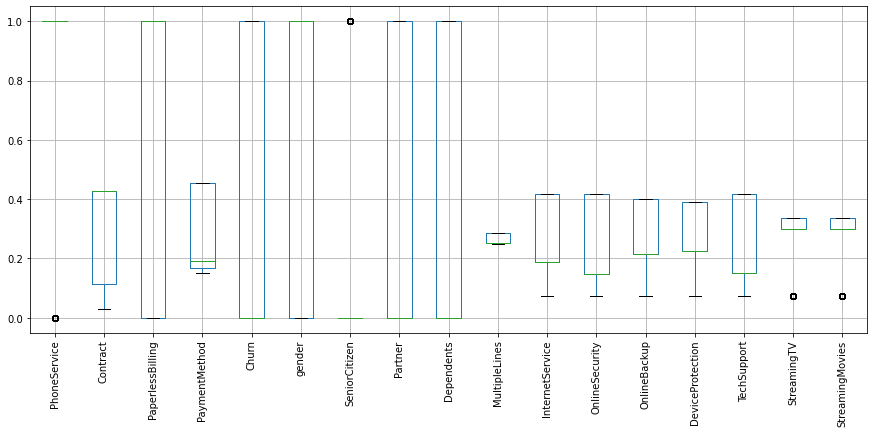

In [0]:
df.boxplot(['PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies'], figsize=(15,6), rot=90)

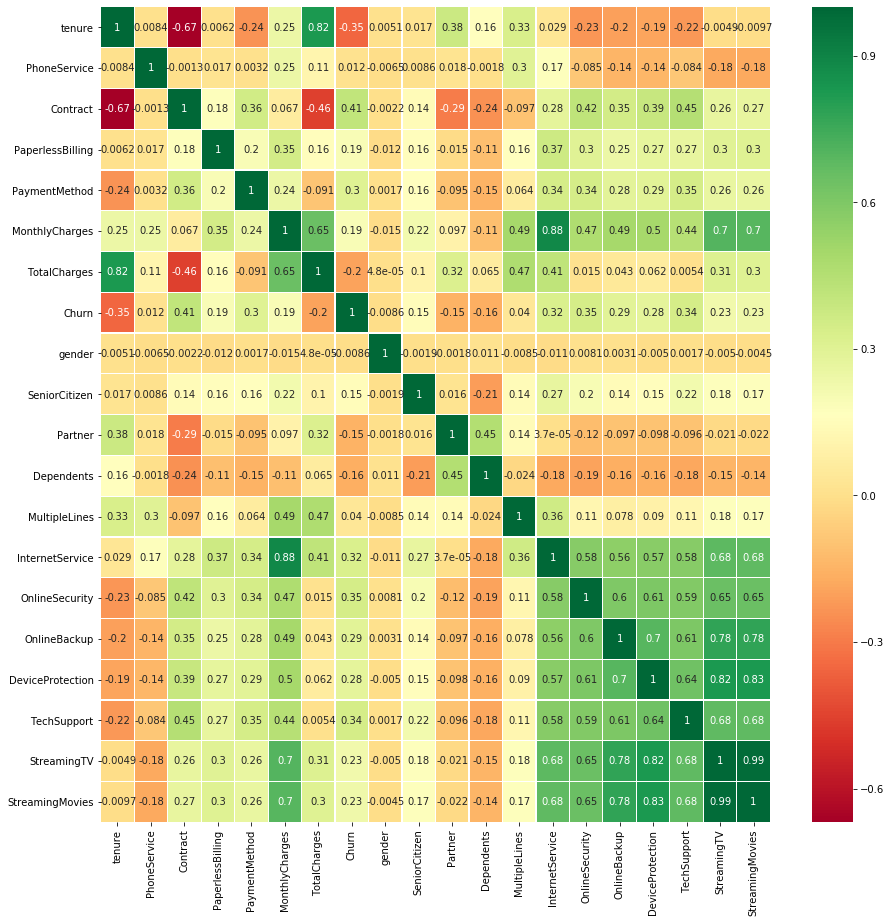

In [12]:
# строим матрицу корреляций
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()

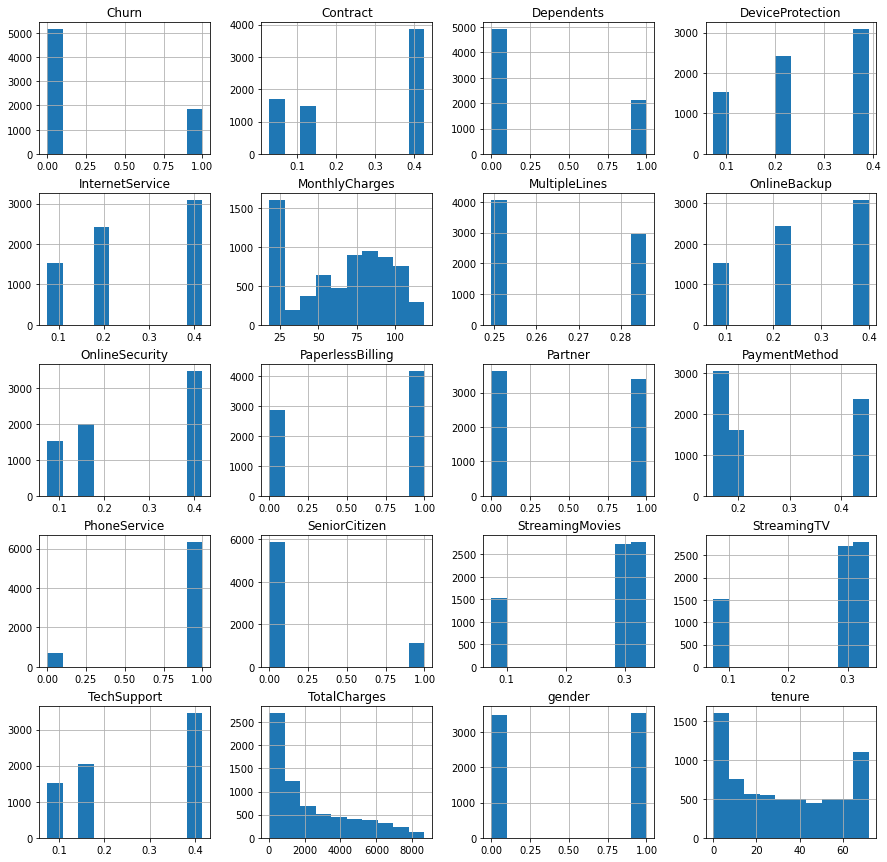

In [0]:
# выводим гистограммы распределений
df.hist(figsize=(15,15))
plt.show()

Выводы: данные очищены от пустых значений, выбросов данные не имеют, категориальные переменные приведены к числовому формату. В ходе предварительного анализа выяснили, что переменные не распределены нормально, что подразумевает применение непараметрических критериев оценки выдвигаемых гипотез, целевая переменная имеет слабые линейные связи с другими факторами, что необходимо учитывать при построении моделей обучения и отдавать предпочтение нелинейным моделям.

# Анализ влияния факторов на целевую переменную

Используя статистические тесты проверки гипотез и средства визуализации, проверим, какие факторы оказывают статистически значимое влияние на целевую переменную, чтобы опеределить, каким образом рациональнее организовать мероприятия по снижению оттока.

In [11]:
# рассчитаем процент ушедших клиентов
print('Сколько клиентов ушло:', len(df[df['Churn'] == 1]))
print('Сколько клиентов осталось:', len(df[df['Churn'] == 0]))
print('Процент ушедших:', round(((len(df[df['Churn'] == 1])*100)/len(df)), 2))

Сколько клиентов ушло: 1869
Сколько клиентов осталось: 5174
Процент ушедших: 26.54


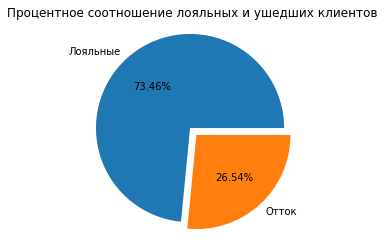

In [12]:
vals = [5174, 1869]
labels = ['Лояльные', 'Отток']
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.2f%%', explode=explode)
ax.axis("equal")
plt.title('Процентное соотношение лояльных и ушедших клиентов')
plt.savefig('Процентное соотношение лояльных и ушедших клиентов.png', format='png', dpi=100)
plt.show()

In [13]:
# рассчитаем коэффициент корреляции Спирмена для наиболее коррелирующих с оттоком параметров из таблицы корреляций
from scipy.stats import spearmanr
for param in ['tenure', 'Contract', 'InternetService', 'OnlineSecurity', 'TechSupport']:
    stat, p = spearmanr(df['Churn'], df[param])
    print(param, ':', 'stat=%.3f' % (stat))

tenure : stat=-0.367
Contract : stat=0.406
InternetService : stat=0.321
OnlineSecurity : stat=0.342
TechSupport : stat=0.338


Рассмотрим зависимость оттока от времени пользования интернет-сервисом

In [13]:
def tenure_group(tenure):
    """группирует время пользования сервисом по годам"""
    if tenure <= 12:
        return '1До года'
    elif tenure <= 24:
        return '2До двух лет'
    elif tenure <= 36:
        return '3До трех лет'
    elif tenure <= 48:
        return '4До четырех лет'
    elif tenure <= 60:
        return '5До пяти лет'
    elif tenure <= 72:
        return '6До шести лет'

In [14]:
original_df['tenure_group'] = original_df['tenure'].apply(tenure_group)

In [15]:
table_tenure = pd.crosstab(original_df['tenure_group'], original_df['Churn'])
table_tenure

Churn,No,Yes
tenure_group,,
1До года,1149,1037
2До двух лет,730,294
3До трех лет,652,180
4До четырех лет,617,145
5До пяти лет,712,120
6До шести лет,1314,93


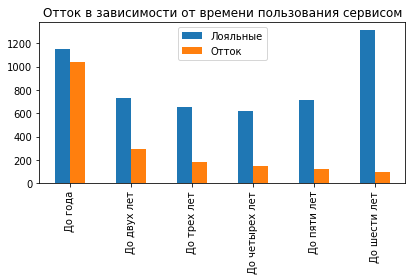

In [39]:
table_tenure.plot(kind='bar')
plt.xticks(range(6), ['До года', 'До двух лет', 'До трех лет', 'До четырех лет', 'До пяти лет', 'До шести лет'])
plt.xlabel('')
plt.title('Отток в зависимости от времени пользования сервисом')
plt.legend(['Лояльные', 'Отток'])
plt.tight_layout()
plt.savefig('Распределение оттока в зависимости от времени пользования сервисом.png', format='png', dpi=100)
plt.show()

In [18]:
# выдвигаем гипотезу о том, что отток одинаков для всех временных групп
# проверяем гипотезу с помощью критерия Хи-квадрат Пирсона
from scipy import stats
chi2, prob, df, expected = stats.chi2_contingency(table_tenure)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format(chi2, df, prob))

test Statistics: 873.8577602525022
degrees of freedom: 5
p-value: 1.209674165469595e-186



Получили p-value близкое к нулю, следовательно, зависимость частоты случаев оттока от времени пользования интренет-сервисом статистически значима, что также подтверждено и графически

Определим зависимость оттока от типа контракта

In [22]:
table_contract = pd.crosstab(original_df['Contract'], original_df['Churn'])
table_contract

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


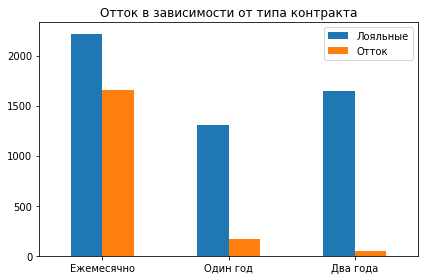

In [38]:
table_contract.plot(kind='bar', rot=0)
plt.title('Отток в зависимости от типа контракта')
plt.xticks(range(3), ['Ежемесячно', 'Один год', 'Два года'])
plt.xlabel('')
plt.legend(['Лояльные', 'Отток'])
plt.tight_layout()
plt.savefig('Распределение оттока в зависимости от контракта.png', format='png', dpi=100)
plt.show()

Из графического представления видим, что максимальный отток среди клиентов, заключивших контракт по типу месяц-к-месяцу, и низкий отток для заключивших контракт на год или на два.

Визуализируем отток в зависимости от подключенного типа интернет услуг, наличия/отсутствия подключенной онлайн безопасности и от пола

In [113]:
table_internet_service = pd.crosstab(original_df['InternetService'], original_df['Churn'])
table_internet_service

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


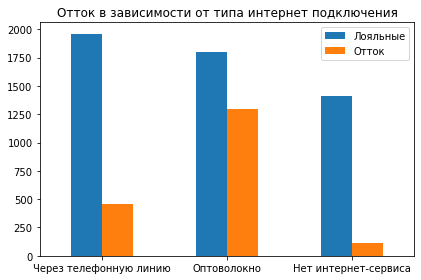

In [37]:
table_internet_service.plot(kind='bar', rot=0)
plt.title('Отток в зависимости от типа интернет подключения')
plt.xticks(range(3), ['Через телефонную линию', 'Оптоволокно', 'Нет интернет-сервиса'])
plt.xlabel('')
plt.legend(['Лояльные', 'Отток'])
plt.tight_layout()
plt.savefig('Распределение оттока в зависимости от типа интернет услуг.png', format='png', dpi=100)
plt.show()

Наглядно отток значительно выше у подключенных через оптоволоконный кабель

In [0]:
# проверим, является ли эта зависимость статистически значимой с помощью критерия Хи-квадрат Пирсона
chi2, prob, df, expected = stats.chi2_contingency(table_internet_service)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format(chi2, df, prob))

test Statistics: 732.309589667794
degrees of freedom: 2
p-value: 9.571788222840544e-160



Действительно p-value стремится к нулю, зависимость частоты оттока от выбранного типа интернет-услуги стастически значима

Проверим влияние пола абонента на отток

In [25]:
table_gender = pd.crosstab(original_df['gender'], original_df['Churn'])
table_OnlineSecurity = pd.crosstab(original_df['OnlineSecurity'], original_df['Churn'])

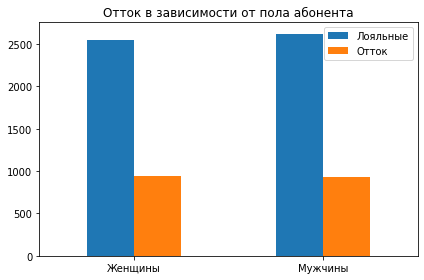

In [36]:
table_gender.plot(kind='bar', rot=0)
plt.title('Отток в зависимости от пола абонента')
plt.xticks(range(2), ['Женщины', 'Мужчины'])
plt.xlabel('')
plt.legend(['Лояльные', 'Отток'])
plt.tight_layout()
plt.savefig('Отток в зависимости от пола.png', format='png', dpi=100)
plt.show()

Как видим из графика, отток среди мужчин и женщин примерно одинаков

Определим влияние наличия/отсутствия онлайн-безопасности на отток

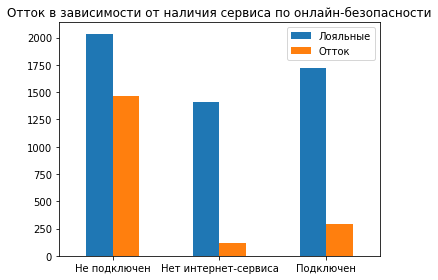

In [61]:
table_OnlineSecurity.plot(kind='bar', rot=0)
plt.title('Отток в зависимости от наличия сервиса по онлайн-безопасности')
plt.xticks(range(3), ['Не подключен', 'Нет интернет-сервиса', 'Подключен'])
plt.xlabel('')
plt.legend(['Лояльные', 'Отток'])
plt.tight_layout()
plt.savefig('Отток в зависимости от онлайн безопасности.png', format='png', dpi=100)
plt.show()

Отток среди клиентов с подключенным сервисом онлайн-безопасности ниже, чем при отсутствии этого сервиса

Проверим, есть ли статистически значимые различия в суммах ежемесячных платежей у лояльных и ушедших клиентов

In [42]:
# сделаем проверку на нормальность распределения для переменной  'MonthlyCharges' 
from scipy.stats import normaltest
stat, p = stats.normaltest(df['MonthlyCharges'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print("Не нормальное распределение для alpha = ", alpha)
else:
    print("Нормальное распределение для alpha = ", alpha)

stat=11419.529, p=0.000
Не нормальное распределение для alpha =  0.05


In [46]:
# т.к. распределение не является нормальным, для проверки статистических гипотез применим непараметрический тест Манна-Уитни
# выдвигаем гипотезу о том, что ежемесячные платежи у лояльных и ушедших клиентов не отличаются
churn_monthly = df[df['Churn'] == 1]['MonthlyCharges']
nochurn_monthly = df[df['Churn'] == 0]['MonthlyCharges']
u, p_value = stats.mannwhitneyu(churn_monthly, nochurn_monthly)
print('p-value =', p_value)

p-value = 1.6558138259942924e-54


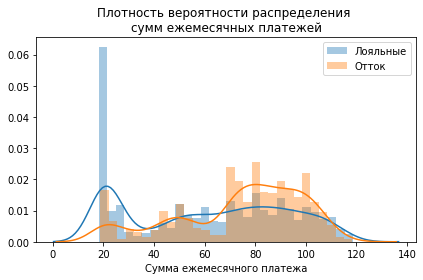

In [79]:
# отобразим графически
sns.distplot(nochurn_monthly, 30)
sns.distplot(churn_monthly, 30)
plt.title('Плотность вероятности распределения \nсумм ежемесячных платежей')
plt.xlabel('Сумма ежемесячного платежа')
plt.legend(['Лояльные', 'Отток'])
plt.tight_layout()
plt.savefig('Плотность вероятности распределения ежемесячных платежей.png', format='png', dpi=100)
plt.show()

Чем больше ежемесячные платежи, тем выше уровень оттока, и наоборот, при минимальных платежах низкий уровень оттока

Получив p_value близкое к нулю, отвергаем нулевую гипотезу, считаем различия в ежемесячных платежах лояльных и ушедших клиентов статистически значимыми

Сравним тип контракта, тип интернет-подключения, наличие/отсутствие интернет-безопасности среди тех, у кого высокие ежемесячные платежи и у кого они низкие. На предыдущем графике видим высокий отток у клиентов с платежами в пределах 70-110 единиц, выделим эту группу отдельно.

In [73]:
high_charges = original_df[(original_df['MonthlyCharges']>=70) & (original_df['MonthlyCharges']<=110)]
low_charges = original_df[(original_df['MonthlyCharges']<70) | (original_df['MonthlyCharges']>110)]

In [74]:
high_charges_tab = pd.crosstab([high_charges['InternetService'], high_charges['OnlineSecurity']], high_charges['Contract'])

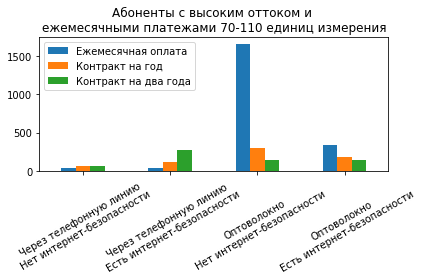

In [75]:
high_charges_tab.plot(kind='bar', rot=30)
plt.title('Абоненты с высоким оттоком и \nежемесячными платежами 70-110 единиц измерения')
plt.xticks(range(4), ['Через телефонную линию\nНет интернет-безопасности', 'Через телефонную линию\nЕсть интернет-безопасности', 'Оптоволокно\nНет интернет-безопасности', 'Оптоволокно\nЕсть интернет-безопасности'])
plt.xlabel('')
plt.legend(['Ежемесячная оплата', 'Контракт на год', 'Контракт на два года'])
plt.tight_layout()
plt.savefig('Отток для высоких платежей.png', format='png', dpi=120)
plt.show()

In [76]:
low_charges_tab = pd.crosstab([low_charges['InternetService'], low_charges['OnlineSecurity']], low_charges['Contract'])

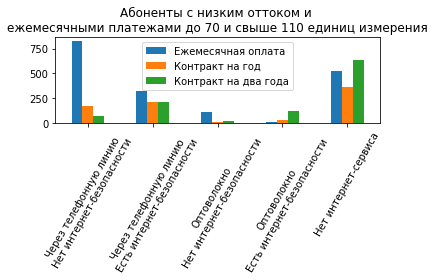

In [80]:
low_charges_tab.plot(kind='bar', rot=60)
plt.title('Абоненты с низким оттоком и \nежемесячными платежами до 70 и свыше 110 единиц измерения')
plt.xticks(range(5), ['Через телефонную линию\nНет интернет-безопасности', 'Через телефонную линию\nЕсть интернет-безопасности', 'Оптоволокно\nНет интернет-безопасности', 'Оптоволокно\nЕсть интернет-безопасности', 'Нет интернет-сервиса'])
plt.xlabel('')
plt.legend(['Ежемесячная оплата', 'Контракт на год', 'Контракт на два года'])
plt.tight_layout()
plt.savefig('Отток для низких платежей.png', format='png', dpi=120)
plt.show()

Те клиенты, у которых высокие ежемесячные платежи, и они наиболее склонны к оттоку, доступ к интернет-услугам осуществляется преимущественно через оптоволоконный кабель, а у лояльных клиентов с низкими платежами доступ через телефонную линию либо вообще не подключен интернет-сервис

Выводы: определили по таблице корреляций наиболее сильно влияющие на показатель оттока факторы - это тип контракта, срок обслуживания в компании, тип подключенной интернет-услуги, наличие сервиса интернет-безопасности, сумма ежемесячных платежей. Проверили данные факторы с помощью гипотез на статистическую значимость, результаты отобразили графически.

# Построение и оценка моделей для прогнозирования оттока

Перед нами стоит задачи бинарной классификации, решать ее будем при помощи моделей машинного обучения: логистической регрессии, деревьев принятия решений, "случайного леса". При оценке качества моделей ввиду несбалансированности классов будем анализировать показатели точности и полноты модели (рrecision и recall), их агрегированный показатель F-меру и значение AUC-ROC

## Подготовка данных

In [11]:
# избавимся от мультиколлинеарности, исключим из данных признак 'StreamingMovies', т.к. он максимально коррелируем с признак 'StreamingTV', axis = 1ом  'StreamingTV'
df_norm = df.drop(['StreamingMovies'], axis=1)
headers = list(df_norm.columns)
headers

['customerID',
 'tenure',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV']

In [12]:
# формируем признаки и целевую переменную
X = df_norm[['tenure',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV']]
y = df_norm['Churn']

In [13]:
# разделяем данные на тренировочные и тестовые
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
# приводим данные к одному масштабу
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# возвращаем к типу датафрейма
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [16]:
X_train.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV
0,-0.746270,0.332958,-0.860255,-1.213432,-0.555559,-1.496769,-0.874692,0.997569,-0.43089,1.030066,1.536424,-0.843037,-1.346645,-1.25040,-1.480881,-1.542552,-1.263509,-1.882237
1,-1.195271,0.332958,0.882757,0.824109,-0.843528,-1.470218,-0.989226,0.997569,-0.43089,1.030066,-0.650862,-0.843037,-1.346645,-1.25040,-1.480881,-1.542552,-1.263509,-1.882237
2,0.682369,0.332958,0.882757,-1.213432,1.395639,1.123468,1.170772,0.997569,-0.43089,-0.970811,-0.650862,1.169853,1.074407,0.98954,-0.384044,1.005924,0.998025,0.347574
3,-1.276908,0.332958,0.882757,0.824109,-0.843528,-0.326872,-0.987518,-1.002437,-0.43089,-0.970811,-0.650862,-0.843037,-0.535542,0.98954,1.044391,1.005924,0.998025,0.347574
4,-1.276908,0.332958,0.882757,-1.213432,-0.555559,-1.503407,-1.003243,0.997569,-0.43089,-0.970811,1.536424,-0.843037,-1.346645,-1.25040,-1.480881,-1.542552,-1.263509,-1.882237


## Модель деревьев принятия решений

In [99]:
# обучим модель деревьев принятия решений
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini')

In [100]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
# посчитаем качество модели
tree_predict = tree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_predict))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1573
           1       0.46      0.50      0.48       540

    accuracy                           0.72      2113
   macro avg       0.64      0.65      0.64      2113
weighted avg       0.73      0.72      0.72      2113



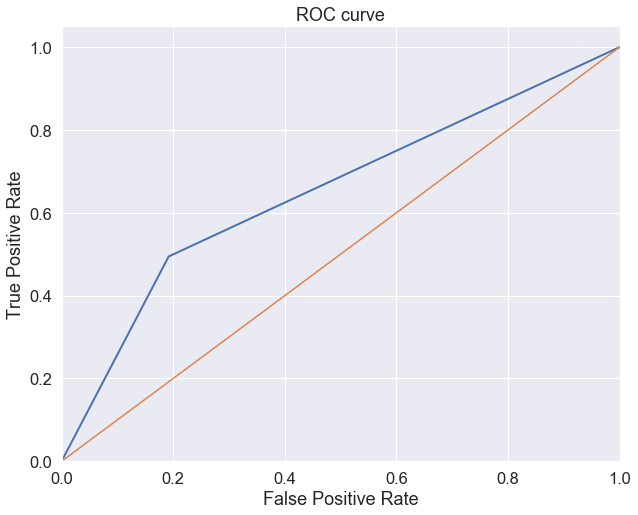

In [166]:
# отрисовка ROC-кривой
from sklearn.metrics import roc_curve
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, tree_predict)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [85]:
from sklearn.metrics import roc_auc_score
print('AUC-ROC:',roc_auc_score(y_test, tree_predict))

AUC-ROC: 0.653071017274472


Модель деревьев принятия решений неплохо справляется с классификацией лояльных клиентов, точность, полнота и F-мера в районе 80%, но достаточно плохо определяет ушедших клиентов, показатели в районе 50%. Это же подтверждает и крутизна ROC-кривой. Значение AUC-ROC равно 65%, т.е. модель примерно с точностью 65% способна различать классы.

## Модель логистической регрессии

In [20]:
# обучим модель логистической регрессии
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [21]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
# посчитаем качество модели
logistic_predict = logistic.predict(X_test)
print(classification_report(y_test, logistic_predict))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1563
           1       0.63      0.52      0.57       550

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



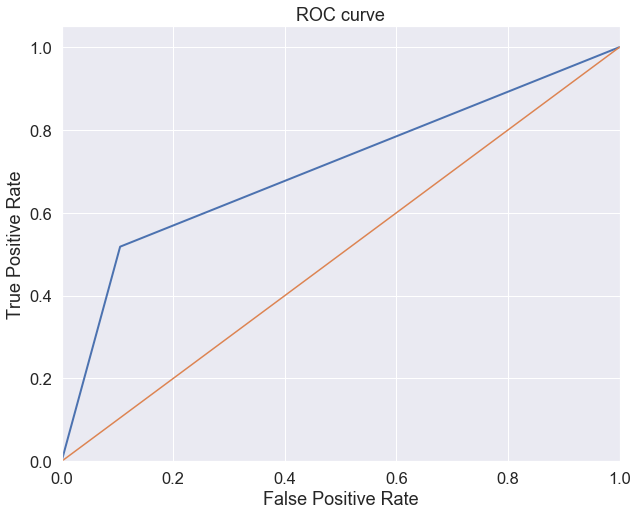

In [78]:
# отрисовка ROC-кривой
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, logistic_predict)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [77]:
print('AUC-ROC:',roc_auc_score(y_test, logistic_predict))

AUC-ROC: 0.7066276973186761


Показатели качествва модели логистической регрессии выше, чем у предыдущей модели, F-мера для лояльных клиентов стремится к 90%, а для ушедших - стремится к 60%, соответственно повысилась способность модели различать классы  и составила 70%, что по-прежнему не очень хорошо.

## Модель "Случайный лес"

In [183]:
# обучим модель "случайный лес"
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=5, min_samples_leaf=5)

In [184]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [185]:
# посчитаем качество модели
forest_predict = forest.predict(X_test)
print(classification_report(y_test, forest_predict))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1536
           1       0.70      0.44      0.54       577

    accuracy                           0.80      2113
   macro avg       0.76      0.68      0.70      2113
weighted avg       0.78      0.80      0.78      2113



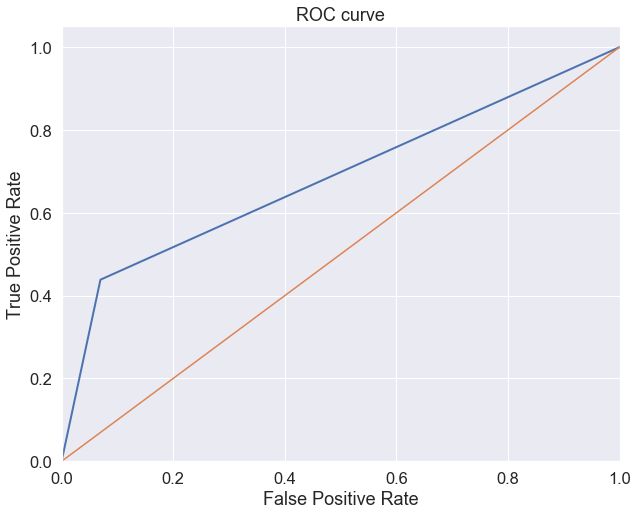

In [186]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, forest_predict)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [187]:
print('AUC-ROC:',roc_auc_score(y_test, forest_predict))

AUC-ROC: 0.6844067058419989


Качество модели "Случайный лес" примерно такое же, как и у модели логистической регресии.
Попробуем поработать ещё с данной моделью, определим наиболее важные атрибуты для модели и отсечем те, чей вес минимальный, и обучим модель заново.

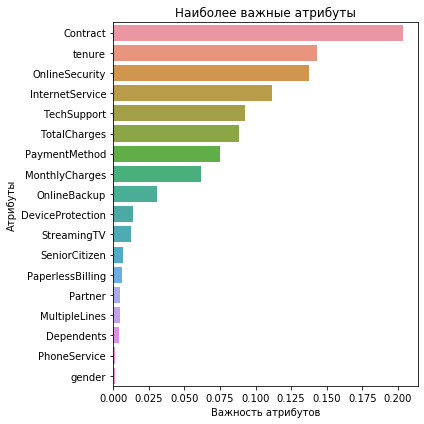

In [26]:
# определим наиболее важные атрибуты для модели
feature_imp = pd.Series(forest.feature_importances_,index=list(X.columns)).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title('Наиболее важные атрибуты')
plt.tight_layout()
plt.savefig('Наиболее важные атрибуты модели Случайный лес.png', format='png', dpi=100)
plt.show()

In [44]:
# попробуем исключить из модели 5 наименее важных атрибутов
# формируем признаки и целевую переменную
X1 = df_norm[['tenure',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Partner',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV']]
y1 = df_norm['Churn']

In [45]:
# разделяем данные на тренировочные и тестовые
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

In [46]:
# приводим данные к одному масштабу
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)
# возвращаем к типу датафрейма
X1_train = pd.DataFrame(X1_train, columns=X1.columns)
X1_test = pd.DataFrame(X1_test, columns=X1.columns)

In [47]:
# обучим модель случайный лес
forest1=RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=5, min_samples_leaf=5)

In [48]:
forest1.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
# посчитаем качество модели
forest1_predict = forest1.predict(X1_test)
print(classification_report(y1_test, forest1_predict))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1539
           1       0.67      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [51]:
print('AUC-ROC:',roc_auc_score(y1_test, forest1_predict))

AUC-ROC: 0.6916568747976536


In [0]:
# качество модели заметно не изменилось

Выводы: были обучены три модели классификации: модель деревьев принятия решений, логистической регрессии и "Случайный лес". Худшие результаты показала модель деревьев принятия решений, две другие модели показали приблизительно одинаковые результаты. Модель "Случайный лес" попробовали улучшить, уменьшив количество факторов, что к значительному улучшению качества не привело, показатели остались на прежнем уровне: агрегированный показатель точности и полноты определения класса лояльных клиентов стремится к 90%, для ушедших клиентов этот показатель стремится к 60%, в целом способность модели разделять классы составляет порядка 70%, что не достаточно хороший результат.

# Улучшение моделей

Попробуeм улучшить модели, уравновесив классы целевой переменной.

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)

In [16]:
# обучим модель логистической регрессии
logistic_samp = LogisticRegression()

In [22]:
logistic_samp.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# посчитаем качество модели
logistic_samp_predict = logistic_samp.predict(X_test)
print(classification_report(y_test, logistic_samp_predict))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1536
           1       0.52      0.81      0.63       577

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.74      0.75      2113



In [24]:
print('AUC-ROC:',roc_auc_score(y_test, logistic_samp_predict))

AUC-ROC: 0.7640498627960717


Качество модели увеличилось примерно на 5%, прежде всего за счет того, что модель стала лучше работать с классом "оттока", повысился показатель полноты охвата

In [17]:
# обучим модель случайный лес
forest_samp=RandomForestClassifier(criterion='entropy', n_estimators=50, max_depth=5, min_samples_leaf=5)

In [18]:
forest_samp.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
# посчитаем качество модели
forest_samp_predict = forest_samp.predict(X_test)
print(classification_report(y_test, forest_samp_predict))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1536
           1       0.50      0.82      0.62       577

    accuracy                           0.72      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.72      0.74      2113



In [20]:
print('AUC-ROC:',roc_auc_score(y_test, forest_samp_predict))

AUC-ROC: 0.7527621317157712


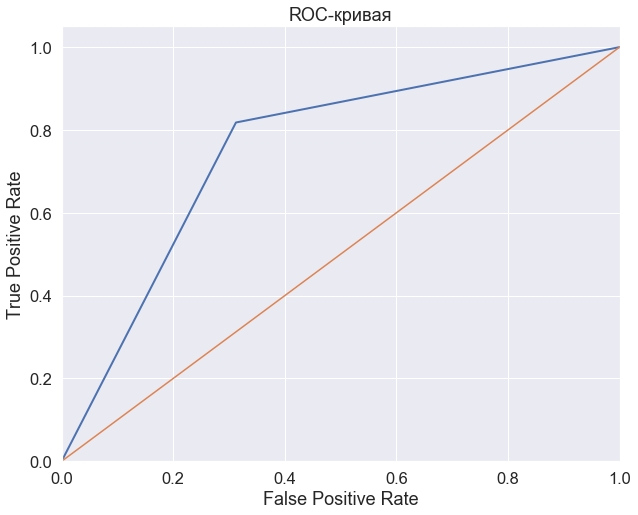

In [188]:
# отрисовка ROC-кривой
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, forest_samp_predict)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.savefig("ROC.png")
plt.show()

Вывод: метод up-sampling позволил повысить качество моделей, находить больше склонных к оттоку клиентов. Значительно увеличился показатель recall (до 80%), т.е. 80% клиентов, которые действительно ушли, мы им это предсказали, при этом для класса лояльных абонентов этот показатель несколько уменьшился, но в целом способность модели различать классы повысилась до 75%. И исходя из графика можно сказать, что алгоритм стал примерно одинаково определять оба класса, а до уравновешивания классов модель лучше определяла класс лояльных клиентов.

# Выдвижение и проверка гипотез по снижению оттока



На основании данных о факторах, максимально влияющих на показатель оттока, с помощью проверки гипотез о том, как при изменении фактора изменится целевой показатель, определим, рационально ли проводить мероприятия по изменению того или иного показателя.

Т.к. нет возможности проверить гипотезы на реальных данных, уберем из датасета целевую переменную и с помощью модели спрогнозируем отток, далее после корректировки данных в соответствии с гипотезой изменение оттока будем рассчитывать, сравнивая с полученным результатом и используя для предсказания ту же модель.

In [25]:
# создаем копию датасета, чтобы определить процент оттока, используя модель "Случайный лес" с уравновешенными классами
df_for_hypothesis = df.copy()

In [26]:
# из датасета удаляем столбец с целевой переменной и неинформативные столбцы
df_for_hypothesis = df_for_hypothesis.drop(['customerID', 'Churn', 'StreamingMovies'], axis=1)

In [27]:
hed = df_for_hypothesis.columns

In [28]:
# приводим данные к одному масштабу
sc = StandardScaler()
df_for_hypothesis = sc.fit_transform(df_for_hypothesis)
# возвращаем к типу датафрейма
df_for_hypothesis = pd.DataFrame(df_for_hypothesis, columns=hed)

In [29]:
# прогнозируем отток
churn_df_for_hypothesis = forest_samp.predict(df_for_hypothesis)
result_df_for_hypothesis = pd.DataFrame(sc.inverse_transform(df_for_hypothesis), columns=hed)
result_df_for_hypothesis['Churn'] = churn_df_for_hypothesis
result_df_for_hypothesis.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Churn
0,1.0,0.0,0.427097,1.0,0.452854,29.85,29.85,0.0,0.0,1.0,0.0,0.249267,0.189591,0.417667,0.215315,0.391276,0.416355,0.335231,1
1,34.0,1.0,0.112695,0.0,0.191067,56.95,1889.50,1.0,0.0,0.0,0.0,0.250442,0.189591,0.146112,0.399288,0.225021,0.416355,0.335231,0
2,2.0,1.0,0.427097,1.0,0.191067,53.85,108.15,1.0,0.0,0.0,0.0,0.250442,0.189591,0.146112,0.215315,0.391276,0.416355,0.335231,1
3,45.0,0.0,0.112695,0.0,0.167098,42.30,1840.75,1.0,0.0,0.0,0.0,0.249267,0.189591,0.146112,0.399288,0.225021,0.151663,0.335231,0
4,2.0,1.0,0.427097,1.0,0.452854,70.70,151.65,0.0,0.0,0.0,0.0,0.250442,0.418928,0.417667,0.399288,0.391276,0.416355,0.335231,1


In [44]:
# рассчитаем процент ушедших клиентов
print('Сколько клиентов ушло:', len(result_df_for_hypothesis[result_df_for_hypothesis['Churn'] == 1]))
print('Сколько клиентов осталось:', len(result_df_for_hypothesis[result_df_for_hypothesis['Churn'] == 0]))
percent = round(((len(result_df_for_hypothesis[result_df_for_hypothesis['Churn'] == 1])*100)/len(result_df_for_hypothesis)), 2)
print('Процент ушедших:', percent)
total_loyal = round(sum(result_df_for_hypothesis[result_df_for_hypothesis['Churn'] == 0]['TotalCharges']), 2)
print('Общая сумма платежей лояльных клиентов:', total_loyal)

Сколько клиентов ушло: 3049
Сколько клиентов осталось: 3994
Процент ушедших: 43.29
Общая сумма платежей лояльных клиентов: 12014711.75


## Гипотеза о том, что если 10% клиентов заключат договор на оказание услуг не с ежемесячной оплатой, а на год, то отток сократится на 5%

Проверим гипотезу о том, что если 10% клиентов заключат договор на оказание услуг не с ежемесячной оплатой, а на год, то отток сократится на 5%

In [48]:
df_hypothesis2 = df.copy()

In [49]:
df_hypothesis2.Contract.value_counts()

0.427097    3875
0.028319    1695
0.112695    1473
Name: Contract, dtype: int64

In [50]:
# словарь каунтов: {'Contract': {'Month-to-month': 0.4270967741935484, 'One year': 0.11269517990495587, 'Two year': 0.02831858407079646}
# сортируем по убыванию значений, первые 194 (5% от всех 'Month-to-month') заменяем на 'One year' (0.11269517990495587)
df_hypothesis2 = df_hypothesis2.sort_values('Contract', ascending=False)
df_hypothesis2.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,0.427097,1,0.452854,29.85,29.85,0,0,0,1,0,0.249267,0.189591,0.417667,0.215315,0.391276,0.416355,0.335231,0.336804
5302,9700-ISPUP,10,1,0.427097,1,0.452854,65.50,616.90,0,0,0,1,1,0.250442,0.189591,0.417667,0.215315,0.391276,0.151663,0.335231,0.299414
2850,2277-DJJDL,60,1,0.427097,1,0.452854,99.00,6017.90,0,1,1,1,0,0.286099,0.418928,0.417667,0.399288,0.391276,0.151663,0.300702,0.299414
5322,8731-WBBMB,26,1,0.427097,0,0.167098,81.90,2078.55,0,0,0,1,0,0.250442,0.189591,0.417667,0.215315,0.225021,0.151663,0.300702,0.299414
5317,1213-NGCUN,6,1,0.427097,1,0.167098,49.65,267.35,1,0,0,0,0,0.250442,0.189591,0.417667,0.399288,0.391276,0.151663,0.335231,0.336804


In [51]:
df_hypothesis2.Contract.iloc[0:390] = 0.11269517990495587

C:\Users\Win10Pro\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
df_hypothesis2.Contract.value_counts()

0.427097    3485
0.112695    1863
0.028319    1695
Name: Contract, dtype: int64

In [53]:
# подготавливаем датасет для прогнозирования оттока с помощью модели "Случайный лес". Удаляем лишние столбцы
df_hypothesis2 = df_hypothesis2.drop(['customerID', 'Churn', 'StreamingMovies'], axis=1)

In [54]:
hed = df_hypothesis2.columns

In [55]:
# приводим данные к одному масштабу
sc = StandardScaler()
df_hypothesis2 = sc.fit_transform(df_hypothesis2)
# возвращаем к типу датафрейма
df_hypothesis2 = pd.DataFrame(df_hypothesis2, columns=hed)

In [56]:
# прогнозируем отток
churn_hypothesis2 = forest_samp.predict(df_hypothesis2)
result_hypothesis2 = pd.DataFrame(sc.inverse_transform(df_hypothesis2), columns=hed)
result_hypothesis2['Churn'] = churn_hypothesis2
result_hypothesis2.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Churn
0,1.0,0.0,0.112695,1.0,0.452854,29.85,29.85,0.0,0.0,1.0,0.0,0.249267,0.189591,0.417667,0.215315,0.391276,0.416355,0.335231,1
1,10.0,1.0,0.112695,1.0,0.452854,65.50,616.90,0.0,0.0,1.0,1.0,0.250442,0.189591,0.417667,0.215315,0.391276,0.151663,0.335231,0
2,60.0,1.0,0.112695,1.0,0.452854,99.00,6017.90,1.0,1.0,1.0,0.0,0.286099,0.418928,0.417667,0.399288,0.391276,0.151663,0.300702,0
3,26.0,1.0,0.112695,0.0,0.167098,81.90,2078.55,0.0,0.0,1.0,0.0,0.250442,0.189591,0.417667,0.215315,0.225021,0.151663,0.300702,0
4,6.0,1.0,0.112695,1.0,0.167098,49.65,267.35,0.0,0.0,0.0,0.0,0.250442,0.189591,0.417667,0.399288,0.391276,0.151663,0.335231,0


In [59]:
# рассчитаем процент ушедших клиентов и суммы, уплаченные лояльными 
print('Сколько клиентов ушло:', len(result_hypothesis2[result_hypothesis2['Churn'] == 1]))
print('Сколько клиентов осталось:', len(result_hypothesis2[result_hypothesis2['Churn'] == 0]))
percent_hypothesis2 = round(((len(result_hypothesis2[result_hypothesis2['Churn'] == 1])*100)/len(result_hypothesis2)), 2)
print('Процент ушедших:', percent_hypothesis2, ', уменьшение на', round(percent-percent_hypothesis2, 2), '%')
total_loyal_hypothesis2 = round(sum(result_hypothesis2[result_hypothesis2['Churn'] == 0]['TotalCharges']), 2)
print('Общая сумма платежей лояльных клиентов:', total_loyal_hypothesis2)
print('Разница платежей:', round(total_loyal_hypothesis2 - total_loyal), ', увеличение на', round((((total_loyal_hypothesis2 - total_loyal)*100)/sum(result_df_for_hypothesis['TotalCharges'])), 2), '%')

Сколько клиентов ушло: 2829
Сколько клиентов осталось: 4214
Процент ушедших: 40.17 , уменьшение на 3.12 %
Общая сумма платежей лояльных клиентов: 12393867.7
Разница платежей: 379156 , увеличение на 2.36 %


Перевод 10% клиентов с ежемесячной оплаты на годовую привел к снижению оттока на 3,12%, что меньше ожидаемого. Выручка при этом увеличилась на 2,36% или на 379 156 денежных единиц. Данную гипотезу можно рассматривать, как один из механизмов по снижению оттока.

## Гипотеза о том, что подключение пятидесяти процентам клиентов сервиса по онлайн-безопасности приведет к снижению оттока на 5%

Проверим гипотезу о том, что подключение пятидесяти процентам клиентов сервиса по онлайн-безопасности приведет к снижению оттока на 5%

In [60]:
df_hypothesis3 = df.copy()

In [61]:
df_hypothesis3.OnlineSecurity.value_counts()

0.417667    3498
0.146112    2019
0.074050    1526
Name: OnlineSecurity, dtype: int64

In [62]:
# словарь каунтов: {'OnlineSecurity': {'No': 0.4176672384219554, 'Yes': 0.14611193660227836, 'No internet service': 0.07404980340760157}}
# сортируем по убыванию значений, первые 175 (5% от все, у кого нет сервиса) заменяем на 'Yes' (0.14611193660227836)
df_hypothesis3 = df_hypothesis3.sort_values('OnlineSecurity', ascending=False)
df_hypothesis3.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,0.427097,1,0.452854,29.85,29.85,0,0,0,1,0,0.249267,0.189591,0.417667,0.215315,0.391276,0.416355,0.335231,0.336804
3111,8809-RIHDD,72,1,0.028319,1,0.452854,103.40,7372.65,1,1,0,1,1,0.286099,0.418928,0.417667,0.215315,0.225021,0.416355,0.300702,0.299414
2700,2346-DJQTB,35,0,0.427097,0,0.452854,24.15,812.50,0,0,0,0,0,0.249267,0.189591,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804
5315,2082-CEFLT,1,1,0.427097,1,0.452854,45.60,45.60,1,1,0,0,0,0.250442,0.189591,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804
2702,1942-OQFRW,1,1,0.427097,0,0.452854,44.00,44.00,0,1,0,0,0,0.250442,0.189591,0.417667,0.399288,0.391276,0.416355,0.335231,0.336804


In [63]:
df_hypothesis3.OnlineSecurity.iloc[0:1750] = 0.14611193660227836

C:\Users\Win10Pro\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [64]:
df_hypothesis3.OnlineSecurity.value_counts()

0.146112    3769
0.417667    1748
0.074050    1526
Name: OnlineSecurity, dtype: int64

In [65]:
# подготавливаем датасет для прогнозирования оттока с помощью модели "Случайный лес". Удаляем лишние столбцы
df_hypothesis3 = df_hypothesis3.drop(['customerID', 'Churn', 'StreamingMovies'], axis=1)

In [66]:
hed = df_hypothesis3.columns

In [67]:
# приводим данные к одному масштабу
sc = StandardScaler()
df_hypothesis3 = sc.fit_transform(df_hypothesis3)
# возвращаем к типу датафрейма
df_hypothesis3 = pd.DataFrame(df_hypothesis3, columns=hed)

In [68]:
# прогнозируем отток
churn_hypothesis3 = forest_samp.predict(df_hypothesis3)
result_hypothesis3 = pd.DataFrame(sc.inverse_transform(df_hypothesis3), columns=hed)
result_hypothesis3['Churn'] = churn_hypothesis3
result_hypothesis3.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Churn
0,1.0,0.0,0.427097,1.0,0.452854,29.85,29.85,0.0,0.0,1.0,0.0,0.249267,0.189591,0.146112,0.215315,0.391276,0.416355,0.335231,1
1,72.0,1.0,0.028319,1.0,0.452854,103.40,7372.65,1.0,0.0,1.0,1.0,0.286099,0.418928,0.146112,0.215315,0.225021,0.416355,0.300702,0
2,35.0,0.0,0.427097,0.0,0.452854,24.15,812.50,0.0,0.0,0.0,0.0,0.249267,0.189591,0.146112,0.399288,0.391276,0.416355,0.335231,0
3,1.0,1.0,0.427097,1.0,0.452854,45.60,45.60,1.0,0.0,0.0,0.0,0.250442,0.189591,0.146112,0.399288,0.391276,0.416355,0.335231,1
4,1.0,1.0,0.427097,0.0,0.452854,44.00,44.00,1.0,0.0,0.0,0.0,0.250442,0.189591,0.146112,0.399288,0.391276,0.416355,0.335231,1


In [69]:
# рассчитаем процент ушедших клиентов
print('Сколько клиентов ушло:', len(result_hypothesis3[result_hypothesis3['Churn'] == 1]))
print('Сколько клиентов осталось:', len(result_hypothesis3[result_hypothesis3['Churn'] == 0]))
percent_hypothesis3 = round(((len(result_hypothesis3[result_hypothesis3['Churn'] == 1])*100)/len(result_hypothesis3)), 2)
print('Процент ушедших:', percent_hypothesis3, ', уменьшение на', round(percent-percent_hypothesis3, 2), '%')
total_loyal_hypothesis3 = round(sum(result_hypothesis3[result_hypothesis3['Churn'] == 0]['TotalCharges']), 2)
print('Общая сумма платежей лояльных клиентов:', total_loyal_hypothesis3)
print('Разница платежей:', round(total_loyal_hypothesis3 - total_loyal), ', увеличение на', round((((total_loyal_hypothesis3 - total_loyal)*100)/sum(result_df_for_hypothesis['TotalCharges'])), 2), '%')

Сколько клиентов ушло: 2902
Сколько клиентов осталось: 4141
Процент ушедших: 41.2 , уменьшение на 2.09 %
Общая сумма платежей лояльных клиентов: 12437812.95
Разница платежей: 423101 , увеличение на 2.63 %


После подключения пятидесяти процентам клиентов сервиса по онлайн-безопасности отток уменишился на 2,09%, что более чем вдвое меньше ожидаемого, но выручка при этом увеличилась на 2,63%, или 423 101 ден.единиц. Если затраты на подключение сервиса будут ниже, то принимаем гипотезу как жизнеспособную

Выводы: в результате проверки гипотез получили показатель снижения оттока на 2-3 %, аналогичный показатель увеличения выручки. При низких затратах на реализацию предложенных мер их можно рекомендовать к использованию.

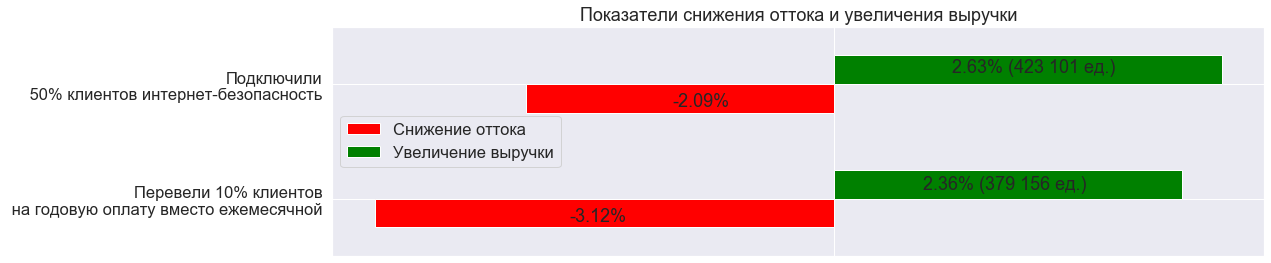

In [182]:
out_hypothesis = pd.DataFrame({'Снижение оттока': [-3.12, -2.09], 'Увеличение выручки': [2.36, 2.63]}, index=['Перевели 10% клиентов\n на годовую оплату вместо ежемесячной', 'Подключили\n 50% клиентов интернет-безопасность'])
colors=['red' if x < 0 else 'green' for x in (-3.12,  2.36, -2.09, 2.63)]
out_hypothesis.plot(kind='barh', color=colors, figsize=(18,4))
plt.title('Показатели снижения оттока и увеличения выручки')
plt.legend(loc='center left')
plt.xticks(range(1),[''])
plt.text(-1.8, -0.2, '-3.12%')
plt.text(-1.1, 0.8, '-2.09%')
plt.text(0.6, 0.08, '2.36% (379 156 ед.)')
plt.text(0.8, 1.1, '2.63% (423 101 ед.)')
plt.tight_layout()
plt.savefig('Показатели снижения оттока.png', format='png', dpi=100)
plt.show()